In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('harga_real_estate.csv')
#  Tampilkan 5 data pertama
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              414 non-null    int64  
 1   X1_Usia_Rumah   414 non-null    float64
 2   X2_jarak_MRT    414 non-null    float64
 3   X3_jumlah_toko  414 non-null    int64  
 4   Y_harga_unit    414 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              414 non-null    int64  
 1   X1_Usia_Rumah   414 non-null    float64
 2   X2_jarak_MRT    414 non-null    float64
 3   X3_jumlah_toko  414 non-null    int64  
 4   Y_harga_unit    414 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


In [35]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['X1_Usia_Rumah', 'X2_jarak_MRT', 'X3_jumlah_toko', 'Y_harga_unit']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(414, 4)

In [37]:
data = pd.DataFrame(df_scale)
data.columns = ['X1_Usia_Rumah', 'X2_jarak_MRT', 'X3_jumlah_toko', 'Y_harga_unit']

data_cluster = data.copy()
data.head()

,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
0,1.255628,-0.792495,2.007407,-0.005901
1,0.157086,-0.616612,1.667503,0.310507
2,-0.387791,-0.414015,0.307885,0.685782
3,-0.387791,-0.414015,0.307885,1.237656
4,-1.117223,-0.549997,0.307885,0.376732


# K-means

Text(0, 0.5, 'Inertia')

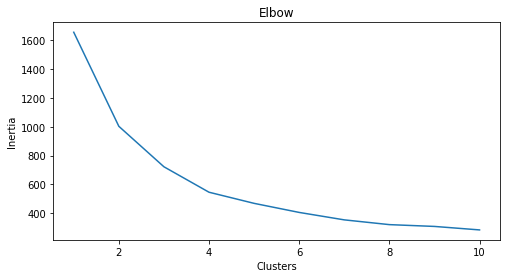

In [38]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [39]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit,cluster_kmeans3,cluster_kmeans4
0,1.255628,-0.792495,2.007407,-0.005901,1,2
1,0.157086,-0.616612,1.667503,0.310507,0,0
2,-0.387791,-0.414015,0.307885,0.685782,0,0
3,-0.387791,-0.414015,0.307885,1.237656,0,0
4,-1.117223,-0.549997,0.307885,0.376732,0,0
...,...,...,...,...,...,...
409,-0.352637,2.378365,-1.391638,-1.661525,2,3
410,-1.064493,-0.788071,1.667503,0.884457,0,0
411,0.095568,-0.549678,0.987694,0.192774,0,0
412,-0.844784,-0.776684,0.307885,1.068415,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


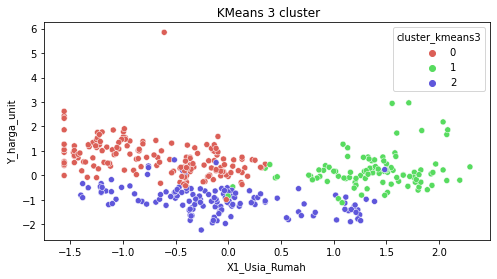

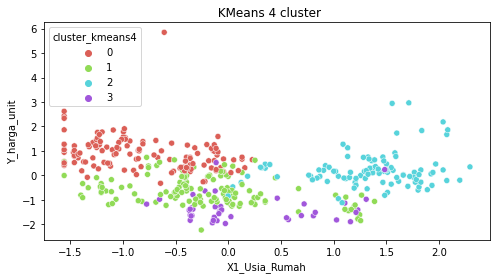

In [41]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['X1_Usia_Rumah'], data_cluster['Y_harga_unit'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['X1_Usia_Rumah'], data_cluster['Y_harga_unit'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

# Hierarchy


In [42]:
data

,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
0,1.255628,-0.792495,2.007407,-0.005901
1,0.157086,-0.616612,1.667503,0.310507
2,-0.387791,-0.414015,0.307885,0.685782
3,-0.387791,-0.414015,0.307885,1.237656
4,-1.117223,-0.549997,0.307885,0.376732
...,...,...,...,...
409,-0.352637,2.378365,-1.391638,-1.661525
410,-1.064493,-0.788071,1.667503,0.884457
411,0.095568,-0.549678,0.987694,0.192774
412,-0.844784,-0.776684,0.307885,1.068415


In [43]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

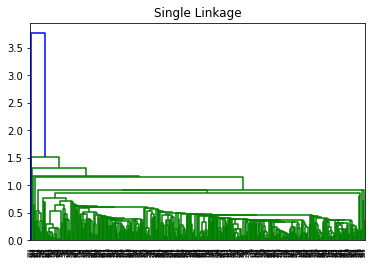

In [44]:
# single linkage
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

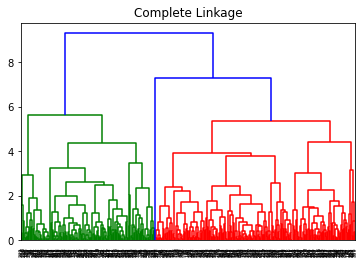

In [45]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [46]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [47]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy
0,1.255628,-0.792495,2.007407,-0.005901,1,2,0
1,0.157086,-0.616612,1.667503,0.310507,0,0,0
2,-0.387791,-0.414015,0.307885,0.685782,0,0,0
3,-0.387791,-0.414015,0.307885,1.237656,0,0,0
4,-1.117223,-0.549997,0.307885,0.376732,0,0,0
...,...,...,...,...,...,...,...
409,-0.352637,2.378365,-1.391638,-1.661525,2,3,1
410,-1.064493,-0.788071,1.667503,0.884457,0,0,0
411,0.095568,-0.549678,0.987694,0.192774,0,0,0
412,-0.844784,-0.776684,0.307885,1.068415,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' Hierarchical Clustering')

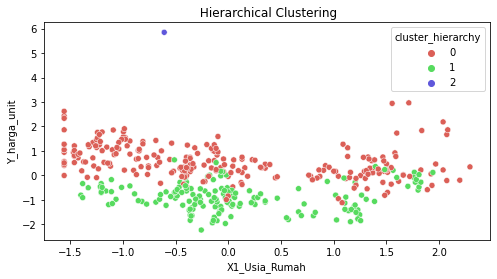

In [49]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['X1_Usia_Rumah'], data_cluster['Y_harga_unit'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title(' Hierarchical Clustering')

# DBSCAN

In [50]:
from sklearn.cluster import DBSCAN

In [51]:
data

,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
0,1.255628,-0.792495,2.007407,-0.005901
1,0.157086,-0.616612,1.667503,0.310507
2,-0.387791,-0.414015,0.307885,0.685782
3,-0.387791,-0.414015,0.307885,1.237656
4,-1.117223,-0.549997,0.307885,0.376732
...,...,...,...,...
409,-0.352637,2.378365,-1.391638,-1.661525
410,-1.064493,-0.788071,1.667503,0.884457
411,0.095568,-0.549678,0.987694,0.192774
412,-0.844784,-0.776684,0.307885,1.068415


In [63]:
# create an object
db = DBSCAN(eps=0.9, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)
print(db.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [64]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
0,1.255628,-0.792495,2.007407,-0.005901,1,2,0,0
1,0.157086,-0.616612,1.667503,0.310507,0,0,0,0
2,-0.387791,-0.414015,0.307885,0.685782,0,0,0,0
3,-0.387791,-0.414015,0.307885,1.237656,0,0,0,0
4,-1.117223,-0.549997,0.307885,0.376732,0,0,0,0
...,...,...,...,...,...,...,...,...
409,-0.352637,2.378365,-1.391638,-1.661525,2,3,1,0
410,-1.064493,-0.788071,1.667503,0.884457,0,0,0,0
411,0.095568,-0.549678,0.987694,0.192774,0,0,0,0
412,-0.844784,-0.776684,0.307885,1.068415,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' DBSCAN clustering')

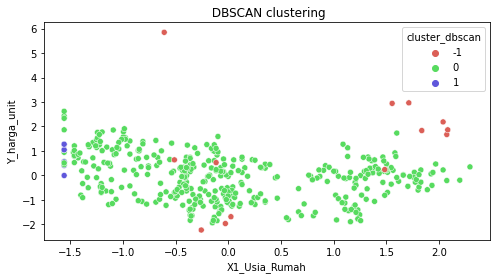

In [65]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['X1_Usia_Rumah'], data_cluster['Y_harga_unit'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',3))
plt.title(' DBSCAN clustering')